## ___Descriptive Statistics___

Descriptive statistics involves summarizing and organizing the data so they can be easily understood. 

Descriptive statistics, unlike inferential statistics, seeks to describe the data, but do not attempt to make inferences from the sample to the whole population. Here, we typically describe the data in a sample. This generally means that descriptive statistics, unlike inferential statistics, is not developed on the basis of probability theory.

In [0]:
# Importing Libraries
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### ___Normal Distribution___

The normal distribution is one of the most important concepts in statistics since nearly all statistical tests require normally distributed data. It basically describes how large samples of data look like when they are plotted. It is sometimes called the “bell curve“ or the “Gaussian curve“. The bell curve is symmetrical. Half of the data will fall to the left of the mean; half will fall to the right.

Inferential statistics and the calculation of probabilities require that a normal distribution is given. This basically means, that if your data is not normally distributed, you need to be very careful what statistical tests you apply to it since they could lead to wrong conclusions.

___A Normal Distribution is given if your data is symmetrical, bell-shaped, centered and unimodal.___

In a perfect normal distribution, each side is an exact mirror of the other. It should look like the distribution on the picture below:

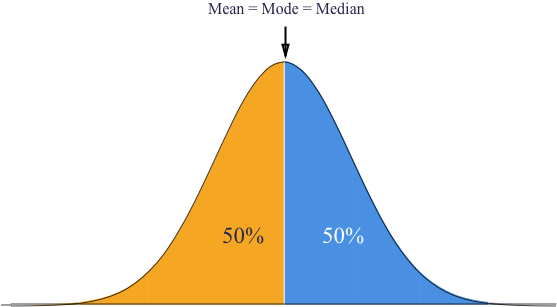

The __Empirical Rule__ (also called the 68-95-99 7 Rule or the Three Sigma Rule) tells you what percentage of your data falls within a certain number of standard deviations from the mean:
* 68% of the data falls within one standard deviation of the mean.
* 95% of the data falls within two standard deviations of the mean.
* 99.7% of the data falls within three standard deviations of the mean.

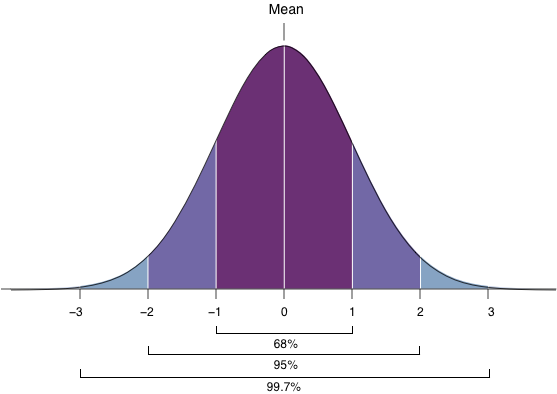

The standard deviation controls the spread of the distribution. A smaller standard deviation indicates that the data is tightly clustered around the mean; the normal distribution will be taller. A larger standard deviation indicates that the data is spread out around the mean; the normal distribution will be flatter and wider.

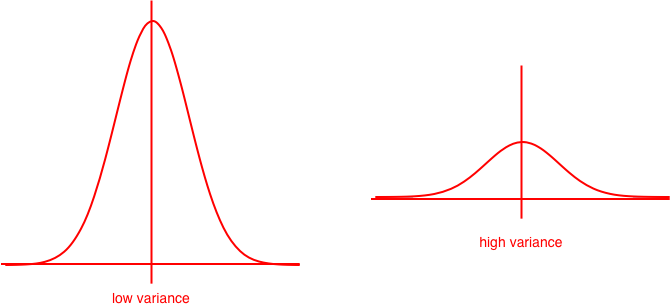

__Properties of a Normal Distribution:__
1. The mean, mode and median are all equal.
2. The curve is symmetric at the center (i.e. around the mean, μ).
3. Exactly half of the values are to the left of center and exactly half the values are to the right.
4. The total area under the curve is 1.

__A Standard Normal Disctribution is a normal distribution with a mean of 0 and a standard deviation of 1.__

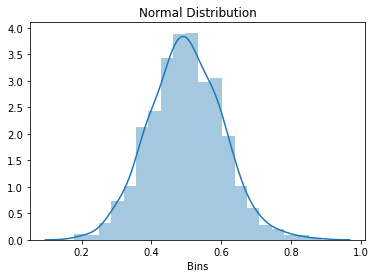

In [0]:
# Creating Normal Distribution with mean = 0.5 and sd = 0.1

np.random.seed(100)

mu, sigma = 0.5, 0.1
Distribution = np.random.normal(mu, sigma, 1000)

# Create the bins and histogram
sns.distplot(Distribution, bins= 20, axlabel= 'Bins', label= 'Normal Distribution')
plt.title('Normal Distribution')
plt.show()

In [0]:
## Reading Dataset - IPL Dataset from Kaggle: https://www.kaggle.com/nowke9/ipldata

In [0]:
import io

deliveries = pd.read_csv('/content/deliveries.csv')
matches = pd.read_csv('/content/matches.csv')

In [0]:
print('Number of rows    =', matches.shape[0])
print('Number of columns =', matches.shape[1])
matches.head()

Number of rows    = 756
Number of columns = 18


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### ___Measures of Frequency___

Frequency statistics include absolute frequencies (raw counts) for each category of the discrete variable, relative frequencies (proportions or percentages of the total number of observations),etc.


#### ___Count___

In [0]:
# Total non null values
matches.winner.count()

752

In [0]:
# Total Value count
len(matches.winner)

756

In [0]:
# NA values
matches.winner.isna().sum()

4

In [0]:
# Total size of column
matches.winner.size

756

In [0]:
# Total unique Values
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [0]:
# Total unique Values count
matches.winner.nunique()

15

#### ___Value Counts___

In [0]:
# Value Counts
matches.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [0]:
# Normalized Value Counts
matches.winner.value_counts(normalize= True,sort= True, ascending= False)

Mumbai Indians                 0.144947
Chennai Super Kings            0.132979
Kolkata Knight Riders          0.122340
Royal Challengers Bangalore    0.111702
Kings XI Punjab                0.109043
Rajasthan Royals               0.099734
Delhi Daredevils               0.089096
Sunrisers Hyderabad            0.077128
Deccan Chargers                0.038564
Gujarat Lions                  0.017287
Pune Warriors                  0.015957
Delhi Capitals                 0.013298
Rising Pune Supergiant         0.013298
Kochi Tuskers Kerala           0.007979
Rising Pune Supergiants        0.006649
Name: winner, dtype: float64

#### ___CrossTabs___

In [0]:
# Crosstabbed Value Count
pd.crosstab(matches.season, matches.winner)

winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
season,,,,,,,,,,,,,,,
2008,9,2,0,7,0,10,0,6,7,0,13,0,0,4,0
2009,8,9,0,10,0,7,0,3,5,0,6,0,0,9,0
2010,9,8,0,7,0,4,0,7,11,0,6,0,0,8,0
2011,11,6,0,4,0,7,6,8,10,4,6,0,0,10,0
2012,10,4,0,11,0,8,0,12,10,4,7,0,0,8,0
2013,12,0,0,3,0,8,0,6,13,4,11,0,0,9,10
2014,10,0,0,2,0,12,0,11,7,0,7,0,0,5,6
2015,10,0,0,5,0,3,0,7,10,0,7,0,0,8,7
2016,0,0,0,7,9,4,0,8,7,0,0,0,5,9,11


In [0]:
results = pd.crosstab(matches.toss_decision, matches.result, margins = True)
results.columns = ['no result','normal','tie', 'Row_sum']
results.index = ['bat','field', 'Col_sum']
results

,no result,normal,tie,Row_sum
bat,1,288,4,293
field,3,455,5,463
Col_sum,4,743,9,756


In [0]:
results/results.loc["Col_sum"]

,no result,normal,tie,Row_sum
bat,0.25,0.387618,0.444444,0.387566
field,0.75,0.612382,0.555556,0.612434
Col_sum,1.00,1.000000,1.000000,1.000000


In [0]:
results/results.loc["Col_sum",'Row_sum']

,no result,normal,tie,Row_sum
bat,0.001323,0.380952,0.005291,0.387566
field,0.003968,0.601852,0.006614,0.612434
Col_sum,0.005291,0.982804,0.011905,1.000000


###___Measure of Central Tendency (Mean, Median, Mode)___

Central tendency refers to the idea that there is one number that best summarizes the entire set of measurements, a number that is in some way “central” to the set.

#### ___Mean / Average___

Mean or Average is a central tendency of the data i.e. a number around which a whole data is spread out. In a way, it is a single number which can estimate the value of whole data set.

1. Mean (usuallly refered to Arithmetic Mean, also called Average) is calculated as sum of all numbers in the dataset and dividing by the total number of values.
2. Another type of mean is geometric mean. It is calculated as Nth root of product of all the numbers, where N is the total number of values in the dataset.

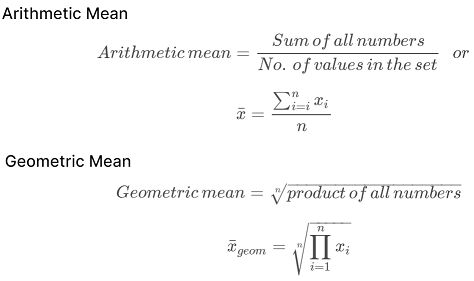


In [0]:
win_by_runs_data = matches[matches['win_by_runs'] > 0].win_by_runs
print('Number of rows =',len(win_by_runs_data))
win_by_runs_data.head()

Number of rows = 337


0     35
4     15
8     97
13    17
14    51
Name: win_by_runs, dtype: int64

In [0]:
# Calculating arithmetic mean

win_by_runs_arithmetic_mean = sum(win_by_runs_data) / len(win_by_runs_data)

print('Arithmetic mean =' ,win_by_runs_arithmetic_mean)

Arithmetic mean = 29.798219584569733


In [0]:
win_by_runs_data.mean()

29.798219584569733

In [0]:
# Calculating geometric mean : https://docs.scipy.org/doc/scipy/reference/stats.mstats.html

win_by_runs_geometric_mean = stats.mstats.gmean(win_by_runs_data)

print('Geometric mean =' ,win_by_runs_geometric_mean)

Geometric mean = 19.24102896835606


#### ___Median___

Median is the value which divides the data in 2 equal parts i.e. number of terms on right side of it is same as number of terms on left side of it when data is arranged in either ascending or descending order.

- Median will be a middle term, if number of terms is odd
- Median will be average of middle 2 terms, if number of terms is even.

In [0]:
win_by_runs_10 = list(win_by_runs_data[:10])
print(win_by_runs_10)
print(sorted(win_by_runs_10))

[35, 15, 97, 17, 51, 27, 5, 21, 15, 14]
[5, 14, 15, 15, 17, 21, 27, 35, 51, 97]


```
[5, 14, 15, 15, 17, 21, 27, 35, 51, 97]
                ^^  ^^  
           (middle numbers)

Median = (17 + 21)/2 = 19
```



In [0]:
win_by_runs_10_median = win_by_runs_data[:10].median()
print('Median (first 10) =', win_by_runs_10_median)

win_by_runs_median = win_by_runs_data.median()
print('Median =', win_by_runs_median)

Median (first 10) = 19.0
Median = 22.0
ERROR! Session/line number was not unique in database. History logging moved to new session 71


#### ___Mode___

Mode is the term appearing maximum time in data set i.e. term that has highest frequency.

But there could be a data set where there is no mode at all as all values appears same number of times. If two values appeared same time and more than the rest of the values then the data set is bimodal. If three values appeared same time and more than the rest of the values then the data set is trimodal and for n modes, that data set is multimodal.

In [0]:
# Retrieve frequency (sorted, descending order)
win_by_runs_data.value_counts(sort=True, ascending=False).head()

14    13
10    11
4     11
1     10
13     9
Name: win_by_runs, dtype: int64

In [0]:
win_by_runs_data_mode = win_by_runs_data.mode()
print('Mode =', list(win_by_runs_data_mode))

Mode = [14]


In [0]:
print('Mode =', stats.mstats.mode(win_by_runs_data))

Mode = ModeResult(mode=array([14.]), count=array([13.]))


### ___Measure of Spread / Dispersion___

By just measuring the center of the data, one wouldn't get much idea about the dataset. Measure of Spread refers to the idea of variability/spread within your data.

#### ___Standard Deviation & Variance___

___Variance___ is a square of average distance between each quantity and mean. That is it is square of standard deviation.

___Standard deviation___ is the measurement of average distance between each quantity and mean. That is, how data is spread out from mean. A low standard deviation indicates that the data points tend to be close to the mean of the data set, while a high standard deviation indicates that the data points are spread out over a wider range of values.
There are situations when we have to choose between sample or population Standard Deviation.
When we are asked to find SD of some part of a population, a segment of population; then we use sample Standard Deviation.

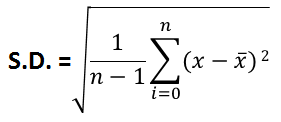

where x̅ is mean of a sample.
But when we have to deal with a whole population, then we use population Standard Deviation.

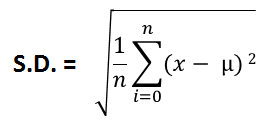

where µ is mean of a population.
Though sample is a part of a population, their SD formulas should have been same, but it is not because the observed values fall (on average) closer to the sample mean instead of the entire population one. Thus, the sample standard deviation underestimates the real one and dividing by (n−1) corrects the result - ___(Bessel's Correction)___

__Comparison with IQR__: IQR is calculated with respect to median, Standard deviation is calculated with respect to mean.

In [0]:
win_by_wickets_data = matches[matches.win_by_wickets > 0].win_by_wickets
win_by_wickets_data.head()

1     7
2    10
3     6
5     9
6     4
Name: win_by_wickets, dtype: int64

In [0]:
# Step 1: calculate mean(μ)
win_by_wickets_mean = win_by_wickets_data.mean()
print(f'Mean = {win_by_wickets_mean}')

# Step 2: calculate numerator part - sum of (x - mean)
win_by_wickets_var_numerator = sum([(x - win_by_wickets_mean) ** 2 for x in win_by_wickets_data])

# Step 3: calculate variane
win_by_wickets_variance = win_by_wickets_var_numerator / len(win_by_wickets_data)
print(f'Variance = {win_by_wickets_variance}')

# Step 4: calculate standard deviation
win_by_wickets_standard_deviation = math.sqrt(win_by_wickets_variance)
print(f'Standard deviation = {win_by_wickets_standard_deviation}')

Mean = 6.238916256157635
Variance = 3.3246924215583893
Standard deviation = 1.8233739116150558


In [0]:
win_by_wickets_standard_deviation_verify = win_by_wickets_data.std(ddof = 0) ### ddof = 0 , population std
print(f'Standard deviation = {win_by_wickets_standard_deviation_verify}')

Standard deviation = 1.8233739116150558


i.e. matches are won by an average of 6.23 wickets with standard deviation of 1.83 (spread = 6.23  ±  1.83)

##### ___What is a Z-Score?___

Simply put, a z-score (also called a standard score) gives you an idea of how far from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is.

A z-score can be placed on a normal distribution curve. Z-scores range from -3 standard deviations (which would fall to the far left of the normal distribution curve) up to +3 standard deviations (which would fall to the far right of the normal distribution curve). In order to use a z-score, you need to know the mean μ and also the population standard deviation σ.

The basic z score formula for a sample is:
```
z = (x – μ) / σ
```

In [0]:
# Z-Score for a match won by 10 Wickets
print('Z-score = ',(10-win_by_wickets_data.mean())/win_by_wickets_data.std())

Z-score =  2.0601638466597523


so a match won by 10 wickets falls 2.06 std away from the mean.


#### ___Mean Deviation / Mean Absolute Deviation___

Mean absolute deviation is the average distance between mean and each data point.

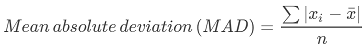


In [0]:
win_by_runs_mad = win_by_runs_data.mad()
print(f'Mean absolute deviation = {win_by_runs_mad}')

Mean absolute deviation = 20.089144044589645


### ___Measure of Position___

#### ___Range___
Range is the simplest form of measuring variability. It is the difference between largest number and smallest number.

In [0]:
win_by_runs_max = win_by_runs_data.max()
win_by_runs_min = win_by_runs_data.min()
win_by_runs_range = win_by_runs_max - win_by_runs_min

print('Largest =', win_by_runs_max)
print('Smallest =', win_by_runs_min)
print('Range =', win_by_runs_range)

Largest = 146
Smallest = 1
Range = 145


#### ___Percentile___
Percentile is a way to represent position of a values in data set. To calculate percentile, values in data set should always be in ascending order.

In general, if k is nth percentile, it implies that n% of the total terms are less than k.

In [0]:
np.percentile(win_by_runs_data,[10,20,80,90])

array([ 5. ,  9. , 44.8, 68.6])

In [0]:
stats.scoreatpercentile(win_by_runs_data,50)

22.0

#### ___Interquartile Range (IQR)___
Interquartile range or IQR is the amount spread in middle 50% of the dataset or the distance between first Quartile (Q₁) and third Quartile (Q₃)

* First Quartile (Q₁) = Median of data points to left of the median in ordered list (25th percentile)
* Second Quartile (Q₂) = Median of data (50th percentile)
* Third Quartile (Q₃) = Median of data points to right of the median in ordered list (75th percentile)

IQR = Q₃ - Q₁

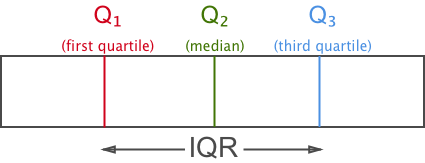

The range gives us a measurement of how spread out the entirety of our data set is. The interquartile range, which tells us how far apart the first and third quartile are, indicates how spread out the middle 50% of our set of data is.

The primary advantage of using the interquartile range rather than the range for the measurement of the spread of a data set is that the interquartile range is not sensitive to outliers.


Note: If you sort data in descending order, the magnitude will be same, just sign will differ. Negative IQR is fine, if your data is in descending order. It just we negate smaller values from larger values, we prefer ascending order (Q3 - Q1).


In [0]:
quant = np.quantile(win_by_runs_data,[0.25,0.75])
print('IQR =', (quant[1] - quant[0]))

IQR = 28.0


In [0]:
print('IQR =', stats.iqr(win_by_runs_data))

IQR = 28.0


In [0]:
print('IQR =',(stats.scoreatpercentile(win_by_runs_data,75) - stats.scoreatpercentile(win_by_runs_data,25)))

IQR = 28.0


### ___Modality___
The modality of a distribution is determined by the number of peaks it contains. Most distributions have only one peak but it is possible that you encounter distributions with two or more peaks.
The picture below shows visual examples of the three types of modality:

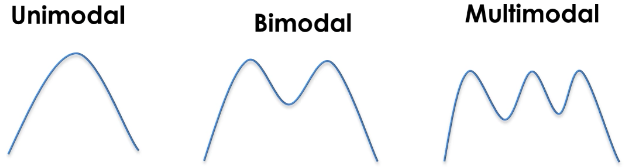

Unimodal means that the distribution has only one peak, which means it has only one frequently occurring score, clustered at the top. A bimodal distribution has two values that occur frequently (two peaks) and a multimodal has two or several frequently occurring values.

### ___Skewness___
Skewness is a measurement of the symmetry of a distribution.

Therefore it describes how much a distribution differs from a normal distribution, either to the left or to the right. The skewness value can be either positive, negative or zero. Note that a perfect normal distribution would have a skewness of zero because the mean equals the median.

Below you can see an illustration of the different types of skewness:

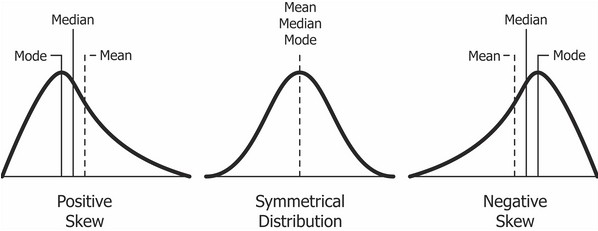

In [0]:
win_by_runs_data.skew()

1.7570395489658672

Text(0.5, 1.0, 'Right Skewed Data')

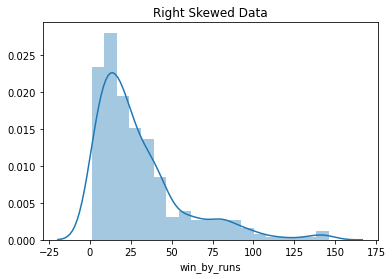

In [0]:
sns.distplot(win_by_runs_data)
plt.title('Right Skewed Data')

Transforming the skewed data to normal distribution discussed in Transformation in data Processing.

In [0]:
# Also Checking Normalaity Tests 
stats.normaltest(win_by_runs_data) #D’Agostino’s K^2 Test
#The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.

NormaltestResult(statistic=123.09813352575927, pvalue=1.8602869461677737e-27)

In [0]:
stats.shapiro(win_by_runs_data) # Shapiro-Wilk Test
# The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

(0.8269662857055664, 9.895202878381175e-19)

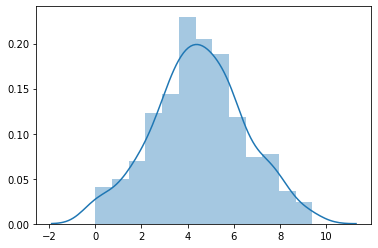

In [0]:
normalized_data, lambda_val = stats.boxcox(win_by_runs_data)
sns.distplot(normalized_data)

In [0]:
from scipy.special import inv_boxcox
original_data = inv_boxcox(normalized_data,lambda_val)

### ___Kurtosis___

Kurtosis measures whether your dataset is heavy-tailed or light-tailed compared to a normal distribution. Data sets with high kurtosis have heavy tails and more outliers and data sets with low kurtosis tend to have light tails and fewer outliers. 

* A histogram is an effective way to show both the skewness and kurtosis of a data set because you can easily spot if something is wrong with your data. 
* A probability plot is also a great tool because a normal distribution would just follow the straight line.

A good way to mathematically measure the kurtosis of a distribution is fishers measurement of kurtosis.

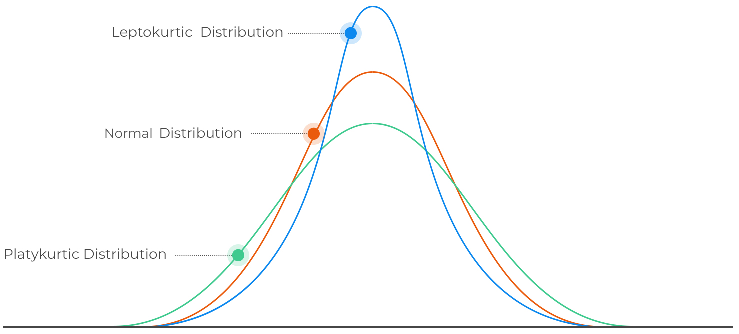

The three most common types of kurtosis:

* A normal distribution is called mesokurtic and has kurtosis of or around zero. 
* A platykurtic distribution has negative kurtosis and tails are very thin compared to the normal distribution. 
* Leptokurtic distributions have kurtosis greater than 3 and the fat tails mean that the distribution produces more extreme values and that it has a relatively small standard deviation.

In [0]:
pd.DataFrame(normalized_data).kurtosis() #platykurtic distribution

0   -0.175594
dtype: float64

(array([17., 16., 27., 57., 65., 57., 47., 24., 20.,  7.]),
 array([0.        , 0.94012898, 1.88025795, 2.82038693, 3.7605159 ,
        4.70064488, 5.64077385, 6.58090283, 7.5210318 , 8.46116078,
        9.40128975]),
 <a list of 10 Patch objects>)

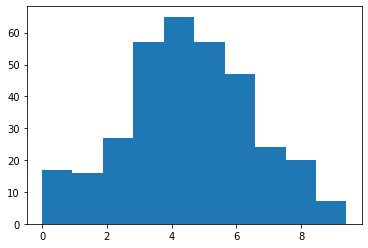

In [0]:
plt.hist(normalized_data)

#### ___Probability Plots___

To fully understand the concepts of probability plots let’s quickly go over a few definitions from probability theory/statistics:

* ___Probability Density Function (PDF)___ — A function that allows us to calculate probabilities of finding a random variable in any interval which belongs to the sample space. It is important to remember that the probability of a continuous random variable taking an exact value is equal to 0.

___PDF of Gaussian Distribution___

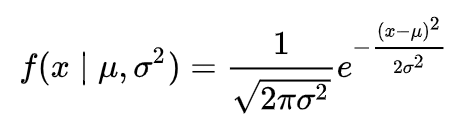


* ___Cumulative Distribution Function (CDF)___ — A function that provides the probability of a random variable taking value equal or less than a given value x. When we are dealing with continuous variables, the CDF is the area under the PDF in the range of minus infinity to x.

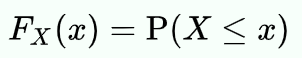

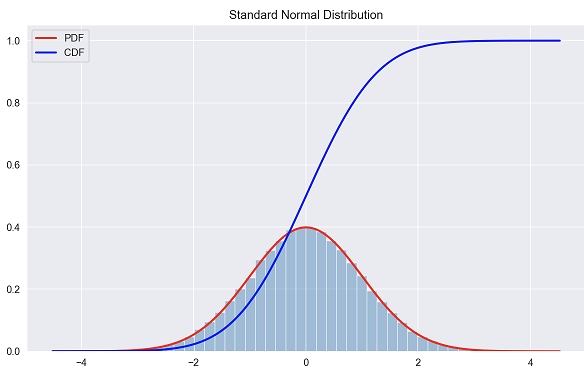

We use probability plots to visually compare data coming from different datasets (distributions). The possible scenarios involve comparing:
- two empirical sets
- one empirical and one theoretical set
- two theoretical sets

The most common use for probability plots is the middle one, when we compare observed (empirical) data to data coming from a specified theoretical distribution like Gaussian.

###### ___P-P Plot___
P-P (probability–probability) plot is a visualization that plots CDFs of the two distributions (empirical and theoretical) against each other.

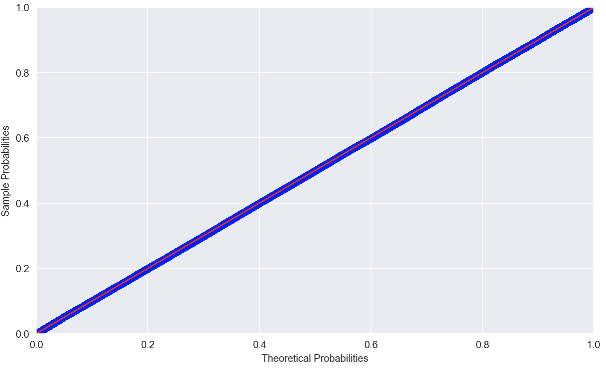

Some key information on P-P plots:
1. Interpretation of the points on the plot: assuming we have two distributions (f and g) and a point of evaluation z (any value), the point on the plot indicates what percentage of data lies at or below z in both f and g (as per definition of the CDF).
2. To compare the distributions we check if the points lie on a 45-degree line (x=y). In case they deviate, the distributions differ.
3. P-P plots are well suited to compare regions of high probability density (center of distribution) because in these regions the empirical and theoretical CDFs change more rapidly than in regions of low probability density.
4. P-P plots require fully specified distributions, so if we are using Gaussian as the theoretical distribution we should specify the location and scale parameters.
Changing the location or scale parameters does not necessarily preserve the linearity in P-P plots.
5. P-P plots can be used to visually evaluate the skewness of a distribution.

###### ___Q-Q Plot___

Similarly to P-P plots, Q-Q (quantile-quantile) plots allow us to compare distributions by plotting their quantiles against each other.

Some key information on Q-Q plots:
1. Interpretation of the points on the plot: a point on the chart corresponds to a certain quantile coming from both distributions (again in most cases empirical and theoretical).
2. On a Q-Q plot, the reference line is dependent on the location and scale parameters of the theoretical distribution. The intercept and slope are equal to the location and scale parameters respectively.
3. A linear pattern in the points indicates that the given family of distributions reasonably describes the empirical data distribution.
4. Q-Q plot gets very good resolution at the tails of the distribution but worse in the center (where probability density is high)
5. Q-Q plots do not require specifying the location and scale parameters of the theoretical distribution, because the theoretical quantiles are computed from a standard distribution within the specified family.
6. The linearity of the point pattern is not affected by changing location or scale parameters.
7. Q-Q plots can be used to visually evaluate the similarity of location, scale, and skewness of the two distributions.

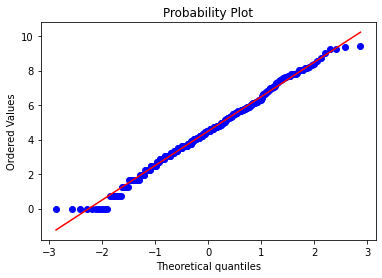

In [0]:
stats.probplot(normalized_data,  plot=plt)
plt.show()

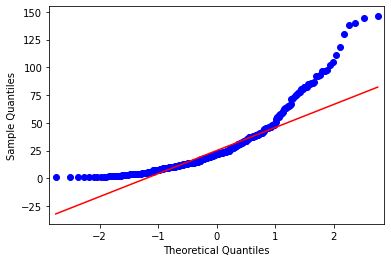

In [0]:
## Q-Q plots of Original data
from statsmodels.api import qqplot
qqplot(win_by_runs_data, line = 'q');

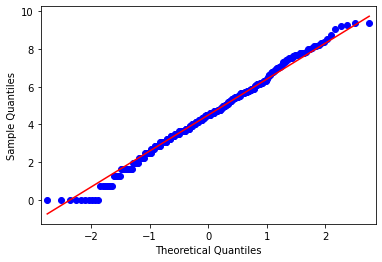

In [0]:
## Q-Q plots of Normalized Data
from statsmodels.api import qqplot
qqplot(normalized_data, line = 'q');